# Linear Regression with Python Scikit Learn
This is a simple linear regression task as it involves just 2 variables.

#### Name: SAMIK BAISHYA


### Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Reading the data from url

In [3]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Analyze the data

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info() #Checking if any null value present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Creating a plot to check if there is any relationship between the no. of study hours vs Score

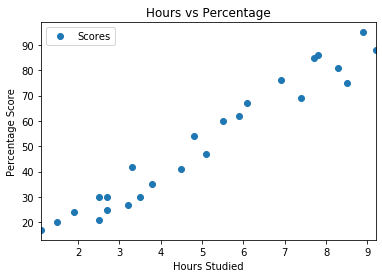

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Time for Training the Dataset
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [12]:
from sklearn.linear_model import LinearRegression  

In [13]:
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Printing the coefficient and intercept

In [15]:
print(reg.intercept_)
print(reg.coef_)

2.018160041434683
[9.91065648]


In [19]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

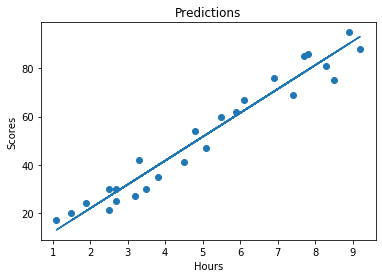

In [21]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title('Predictions')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Time for Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [23]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### The Task was to predict the score if a student studies for 9.25 hours

In [28]:
# You can also test with your own data
hours = 9.25
pred_score=reg.predict([[9.25]])
print('The predicted score is :',pred_score)

The predicted score is : [93.69173249]


### Evaluating the model

In [29]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
